In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#reading dataset
df=pd.read_csv("Electronic_sales_Sep2023-Sep2024.csv")

#previewing data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10483.526550,48.994100,3.093950,3180.133419,578.631867,5.485550,62.244848
std,5631.732525,18.038745,1.223764,2544.978675,312.274076,2.870854,58.058431
min,1000.000000,18.000000,1.000000,20.750000,20.750000,1.000000,0.000000
25%,5478.000000,33.000000,2.000000,1139.680000,361.180000,3.000000,7.615000
50%,10499.500000,49.000000,3.000000,2534.490000,463.960000,5.000000,51.700000
75%,15504.000000,65.000000,4.000000,4639.600000,791.190000,8.000000,93.842500
max,19998.000000,80.000000,5.000000,11396.800000,1139.680000,10.000000,292.770000


In [2]:
# Checking total number of customers
distinct_count = df['Customer ID'].nunique()
print("Total number of distinct values:", distinct_count)

Total number of distinct values: 12136


In [3]:
#checking for missing values
df.isnull().sum()

Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64

In [4]:
#filling the 1 missing gender value with the mode for Genders
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df.isnull().sum()

Customer ID             0
Age                     0
Gender                  0
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64

In [5]:
df_encoded = df.copy()


#################

df_encoded = df.copy()

# Mapping for encoding
gender_mapping = {'Male': 1, 'Female': 0}
loyalty_member_mapping = {'Yes': 1, 'No': 0}
product_type_mapping = {
    'Smartphone': 1,
    'Tablet': 2,
    'Laptop': 3,
    'Smartwatch': 4,
    'Headphones': 5
}
SKU_mapping = {
    'SKU1004': 1,  # smartphone
    'SKU1002': 2,  # tablet
    'SKU1005': 3,  # laptop
    'SKU1003': 4,  # smartwatch
    'HDP456': 5,  # Headphones
}
order_status_mapping = {'Completed': 1, 'Cancelled': 0}
payment_method_mapping = {
    'Credit Card': 1,
    'Debit Card': 2,
    'Cash': 3,
    'Paypal': 4,
    'Bank Transfer': 5
}
shipping_type_mapping = {
    'Standard': 1,
    'Express': 2,
    'Overnight': 3,
    'Same Day': 4,
    'Expedited': 5
}
add_ons_mapping = {
    'Accessory': 1,
    'Impulse Item': 2,
    'Extended Warranty': 3
}

# Apply mapping to the copied DataFrame
df_encoded['Gender'] = df_encoded['Gender'].map(gender_mapping)
df_encoded['Loyalty Member'] = df_encoded['Loyalty Member'].map(loyalty_member_mapping)
df_encoded['Product Type'] = df_encoded['Product Type'].map(product_type_mapping)
#df_encoded['SKU'] = df_encoded['SKU'].map(SKU_mapping)
df_encoded['Order Status'] = df_encoded['Order Status'].map(order_status_mapping)
df_encoded['Payment Method'] = df_encoded['Payment Method'].map(payment_method_mapping)
df_encoded['Shipping Type'] = df_encoded['Shipping Type'].map(shipping_type_mapping)
#df_encoded['Add-ons Purchased'] = df_encoded['Add-ons Purchased'].map(add_ons_mapping)
#df_encoded['Purchase Date'] = pd.to_datetime(df_encoded['Purchase Date'], format='%m/%d/%Y')
df_encoded['Purchase Date'] = pd.to_datetime(df_encoded['Purchase Date'], errors='coerce')
#########

print(df_encoded)


       Customer ID  Age  Gender  Loyalty Member  Product Type      SKU  \
0             1000   53       1               0             1  SKU1004   
1             1000   53       1               0             2  SKU1002   
2             1002   41       1               0             3  SKU1005   
3             1002   41       1               1             1  SKU1004   
4             1003   75       1               1             1  SKU1001   
...            ...  ...     ...             ...           ...      ...   
19995        19996   27       0               0             1   SMP234   
19996        19996   27       0               1             3   LTP123   
19997        19996   27       0               0             5   HDP456   
19998        19997   27       1               0             5   HDP456   
19999        19998   27       1               1             3   LTP123   

       Rating  Order Status  Payment Method  Total Price  Unit Price  \
0           2             0            

In [ ]:
dfc1=df_encoded.drop('SKU', axis=1)
dfc1=dfc1.drop('Purchase Date', axis=1)
dfc1=dfc1.drop('Add-ons Purchased', axis=1)
plt.figure(figsize=(10, 10))  # Adjusted figure size
sns.heatmap(dfc1, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

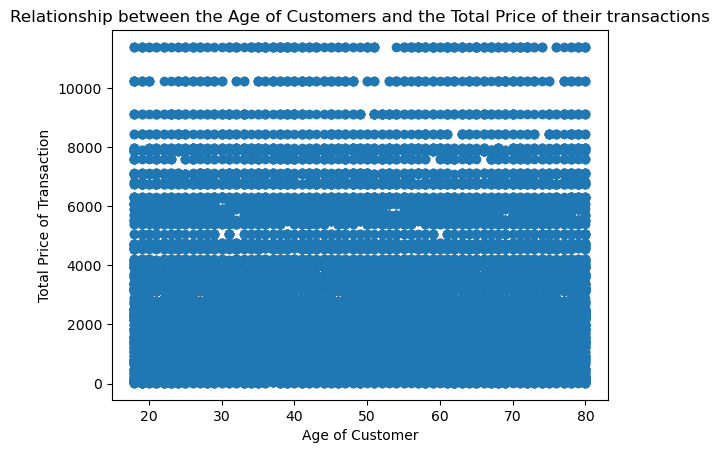

In [15]:
#Creating a Function for Scatter Plot
def scatter_plot(x, y, title="Scatter Plot", x_label="X-axis", y_label="Y-axis"):
    """
    Returns a scatter plot with parameters for data for x & y axis, also labels & titles that can be customized
    """
    plt.scatter(x, y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

# Calling Scatter Plot Function to create a plot between age of customers & total price of their transactions:
scatter_plot(df['Age'], df['Total Price'], title="Relationship between the Age of Customers and the Total Price of their transactions", x_label="Age of Customer", y_label="Total Price of Transaction")


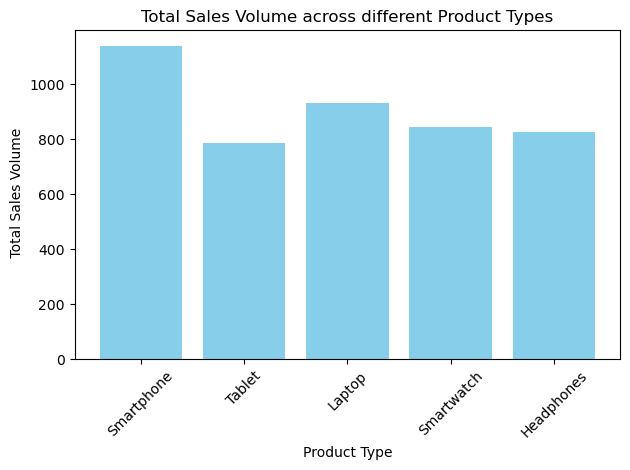

In [8]:
#Creating a Function for Bar Chart
def bar_chart(categories, values, title='Bar Chart', xlabel='Categories', ylabel='Values'):
    """
    Returns a bar chart from a catergory & value in parameters, with customizable title & labels.
    """
    plt.bar(categories, values, color='skyblue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
    plt.show()

# Example usage
bar_chart(df['Product Type'], df['Unit Price'], title='Total Sales Volume across different Product Types', xlabel='Product Type', ylabel=' Total Sales Volume')
